In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from proofreader.utils.vis import plot_3d
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from proofreader.data.cremi import prepare_cremi_vols

train_vols, test_vols = prepare_cremi_vols('../../dataset/cremi')

In [ ]:
from proofreader.data.splitter import SplitterDataset
from proofreader.data.augment import Augmentor
num_slices = [4, 4]
radius = 96
context_slices = 4
num_points = 1024

augmentor = Augmentor(center=True, shuffle=True, normalize=[125, 1250, 1250])
train_dataset = SplitterDataset(test_vols, num_slices, radius, context_slices, num_points=num_points, torch=True, open_vol=True, verbose=False, Augmentor=augmentor)
print(len(train_dataset))

In [ ]:
from torch.utils.data import DataLoader
import torch.nn as nn
dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
model, _ ,_ = build_full_model_from_config(config.model, config.dataset)
model = nn.DataParallel(model)
model = load_model(model, '../../330.ckpt', map_location=torch.device('cpu'))



In [ ]:
from proofreader.model.classifier import *
with torch.no_grad():
    count, acc = 0,0
    for step, batch in enumerate(dataloader):
        count += 1
        # get batch
        x, y = batch
        y_hat = model(x)
        pred = predict_class(y_hat)
        accs = get_accuracy(y, pred)
        print(accs)
        acc += accs['total_acc']
        print(round(acc/count, 3))


In [ ]:
from proofreader.utils.vis import plot_3d
%matplotlib widget
num = 10
lim = (-.1,.1)
lim = (lim,lim,lim)
print(lim)
for i in range(0, num):
    rand_i = random.randint(0, len(dataset))
    pc, label = dataset[rand_i]
    pc = np.swapaxes(pc, 0, 1)
    plot_3d(pc, lims=lim)



In [3]:
from proofreader.data.splitter import SplitterTest
from proofreader.data.augment import Augmentor
from proofreader.utils.torch import load_model
from proofreader.model.config import *
from torch.utils.data import DataLoader
import torch.nn as nn

config = get_config('cn_context_4_aug_small')

# model, _ ,_ = build_full_model_from_config(config.model, config.dataset)
# model = nn.DataParallel(model)
# model = load_model(model, '../../330.ckpt', map_location=torch.device('cpu'))

num_slices = 4
radius = 96
context_slices = 4
num_points = 1024
augmentor = Augmentor(center=True, shuffle=True, normalize=[125, 1250, 1250])
tester = SplitterTest(test_vols, num_slices, radius, context_slices, num_points=num_points, Augmentor=augmentor, add_batch_id=True, verbose=False)


In [4]:
%matplotlib inline

0 tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 2]])


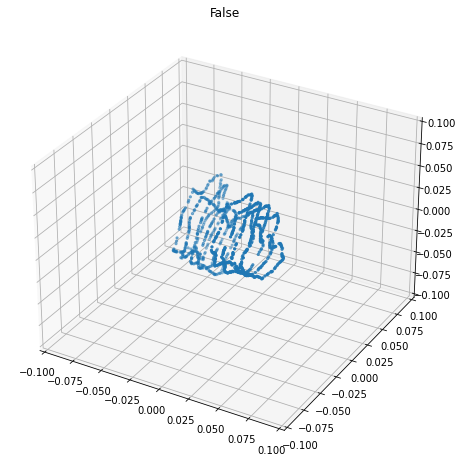

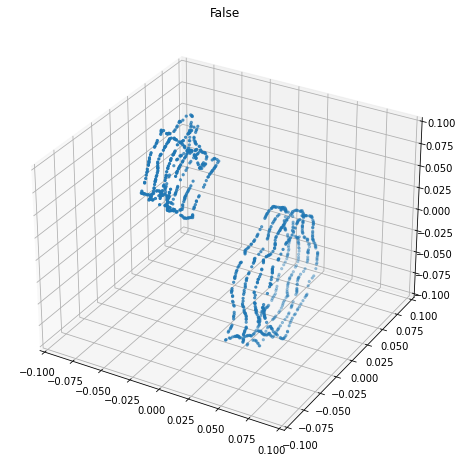

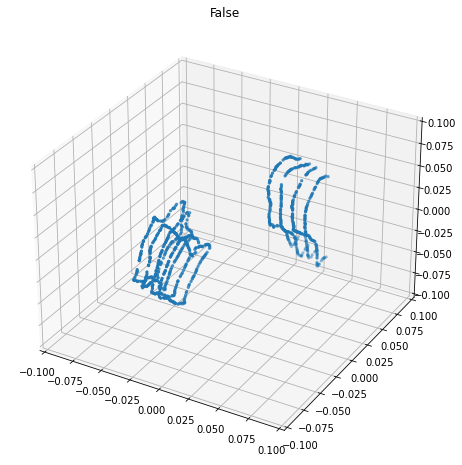

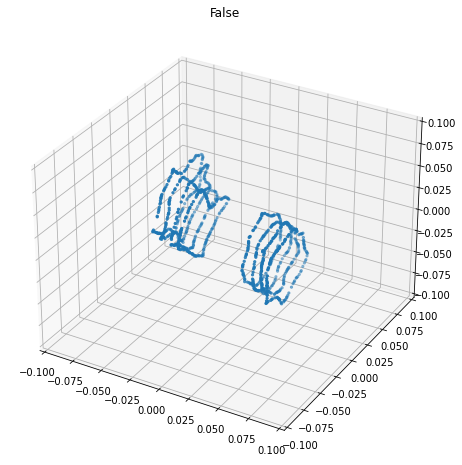

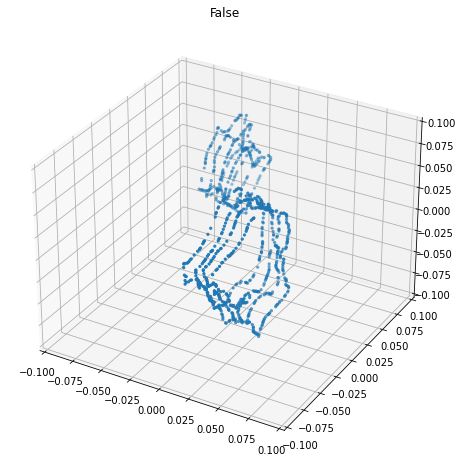

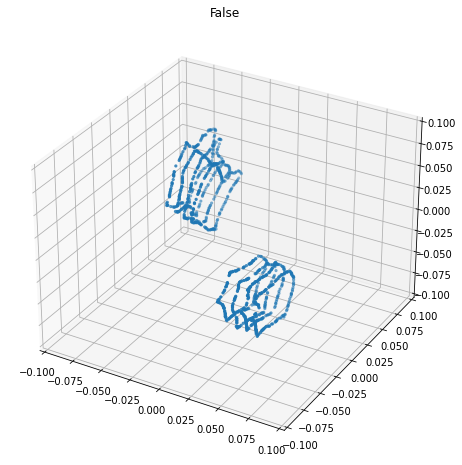

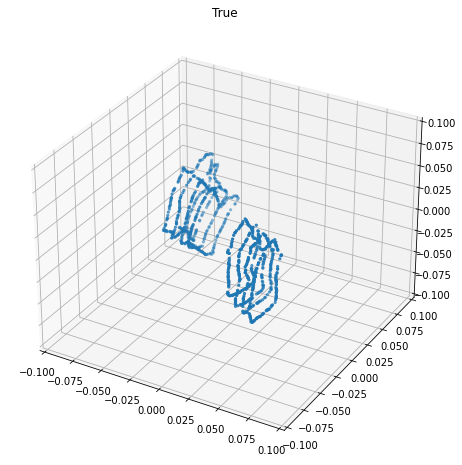

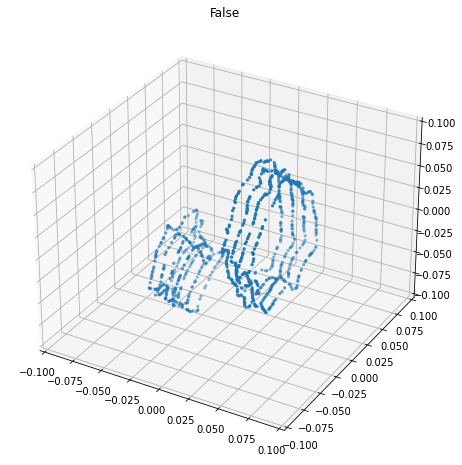

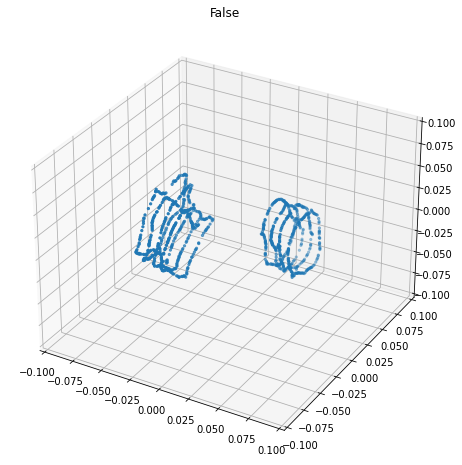

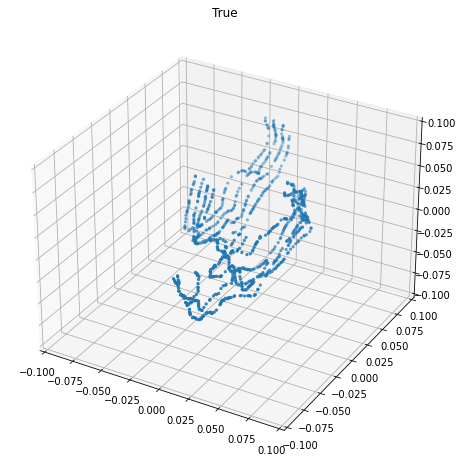

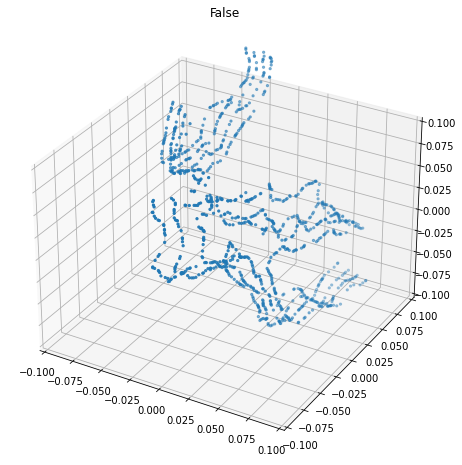

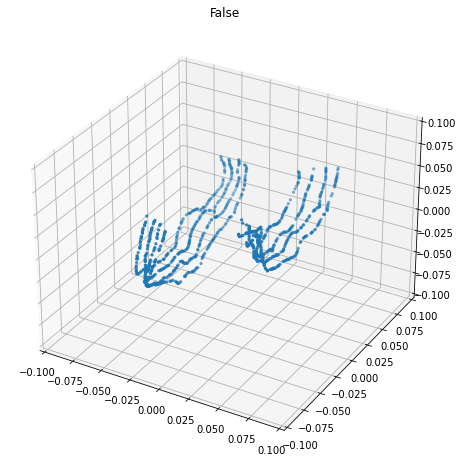

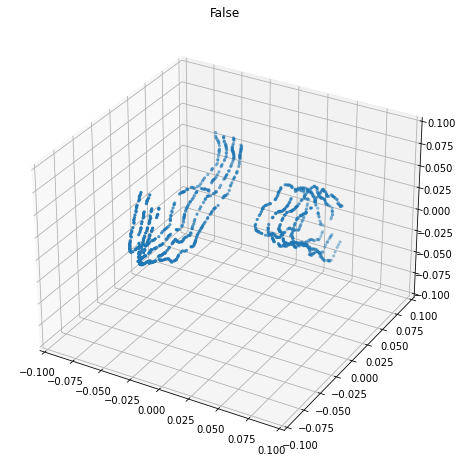

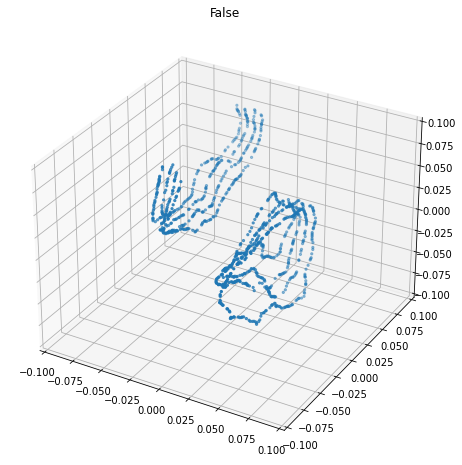

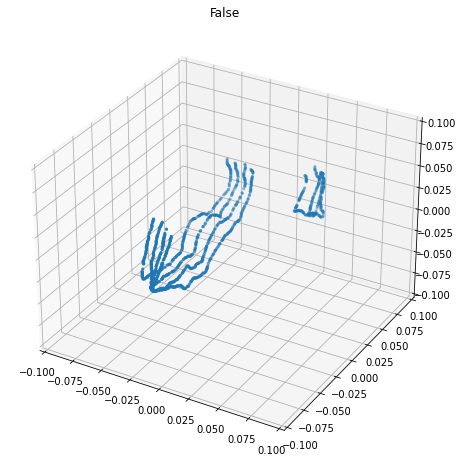

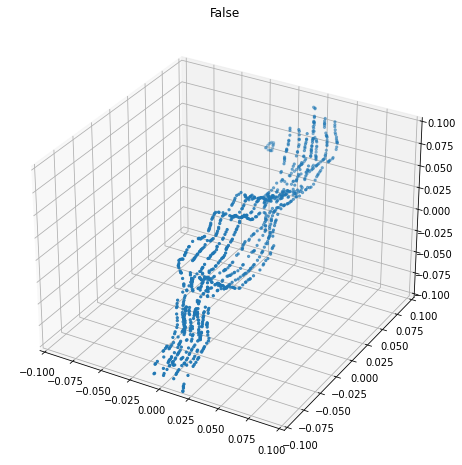

1 tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])


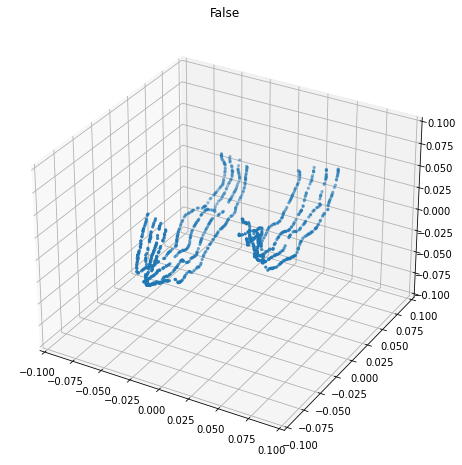

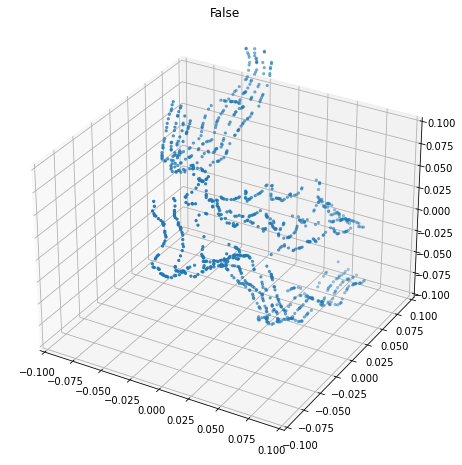

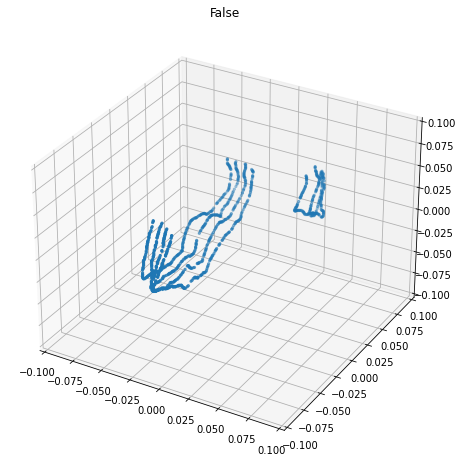

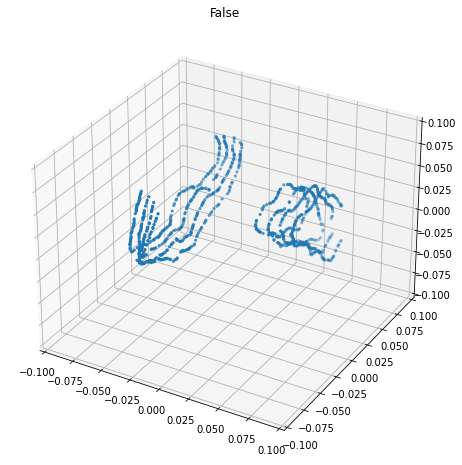

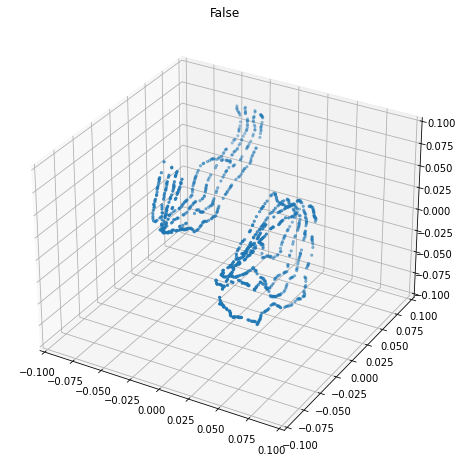

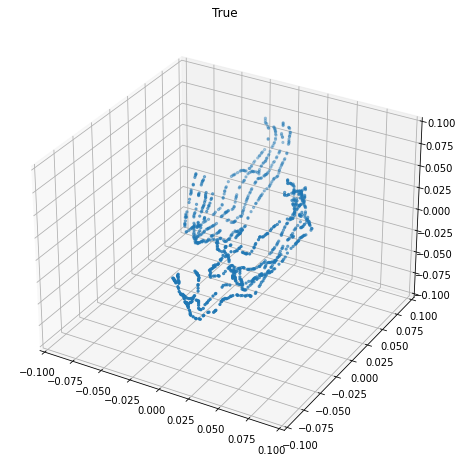

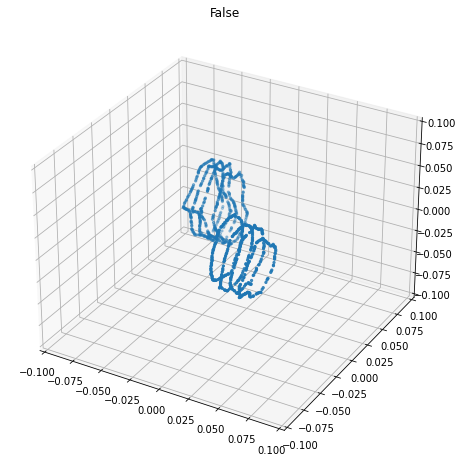

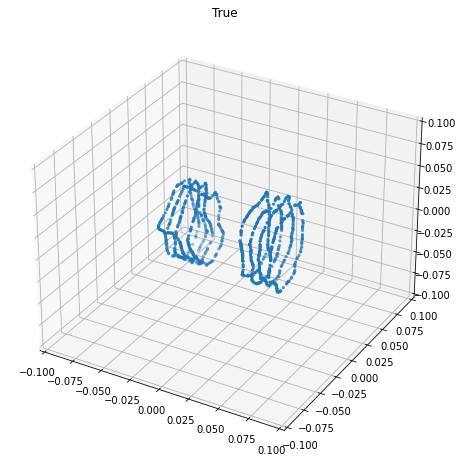

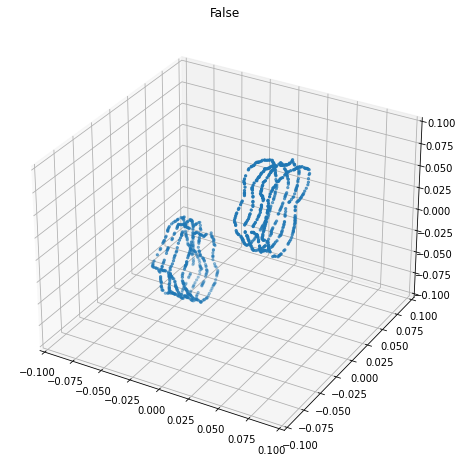

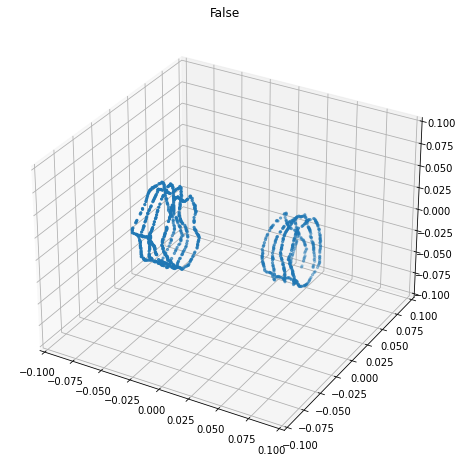

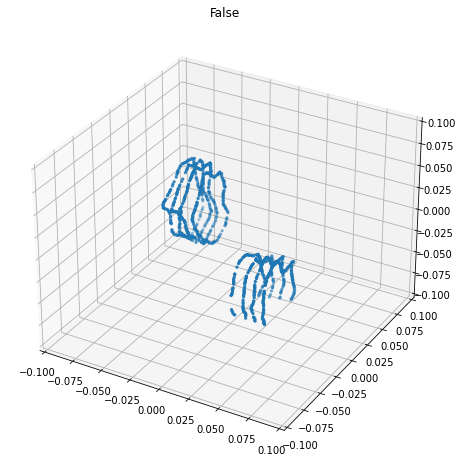

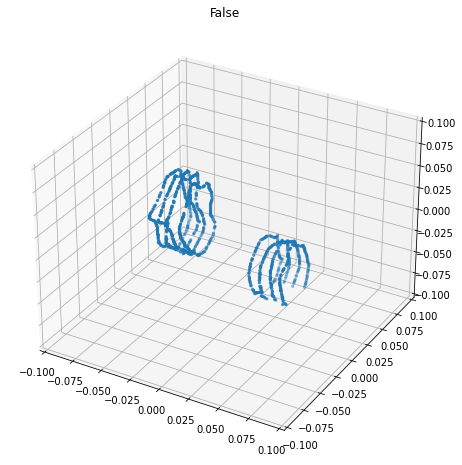

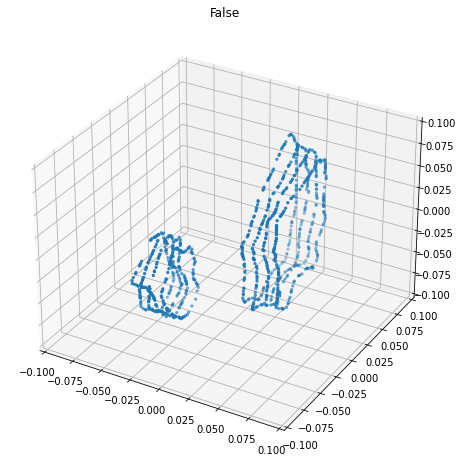

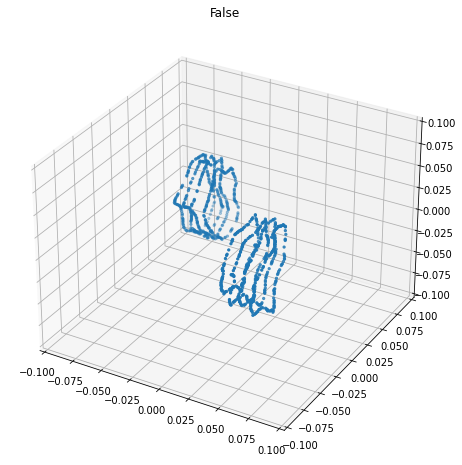

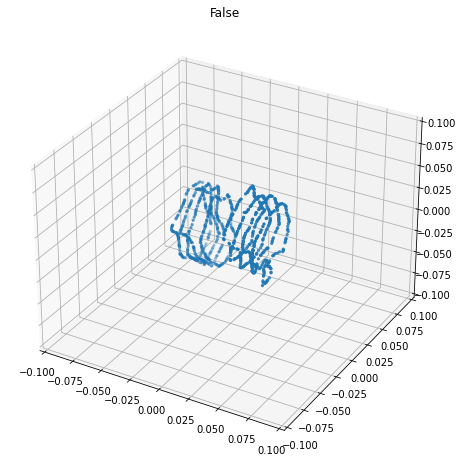

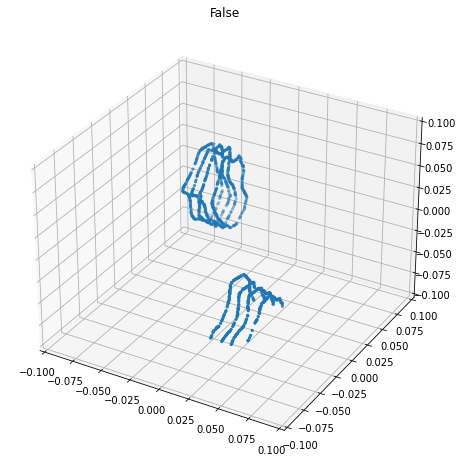

2 tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])


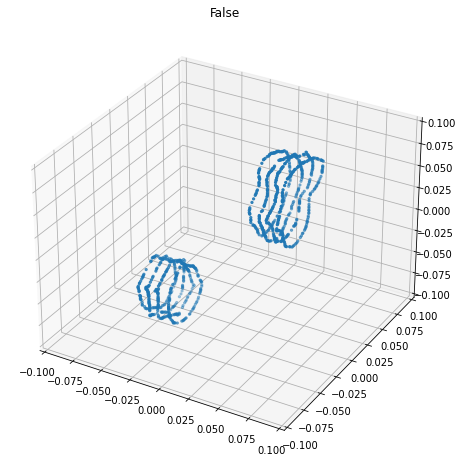

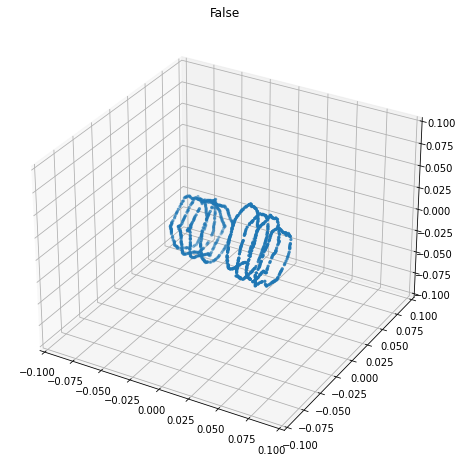

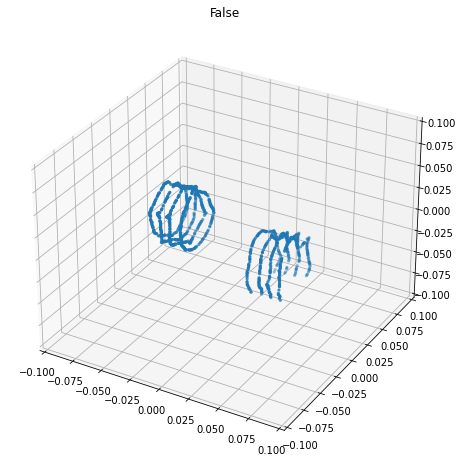

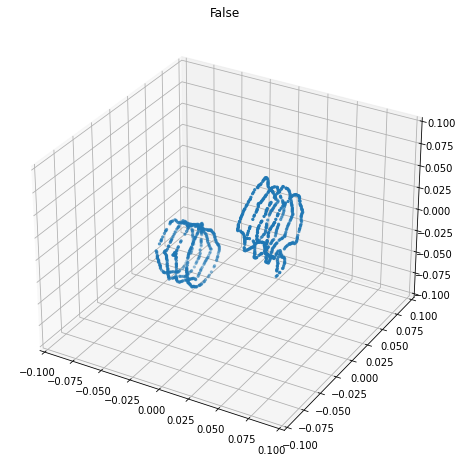

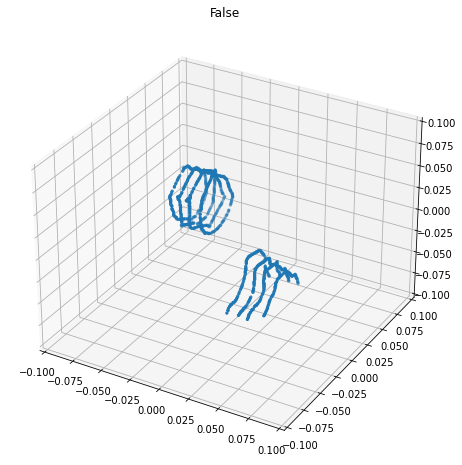

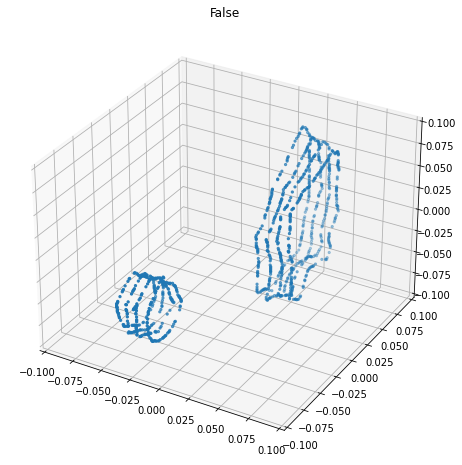

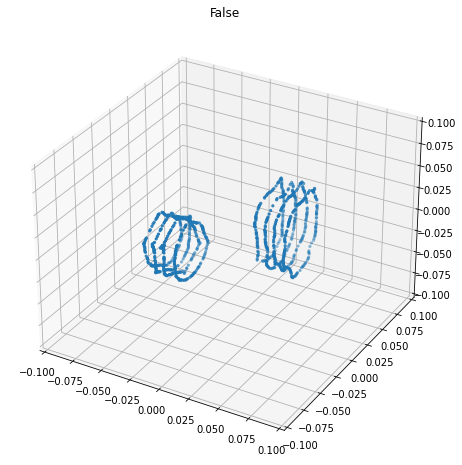

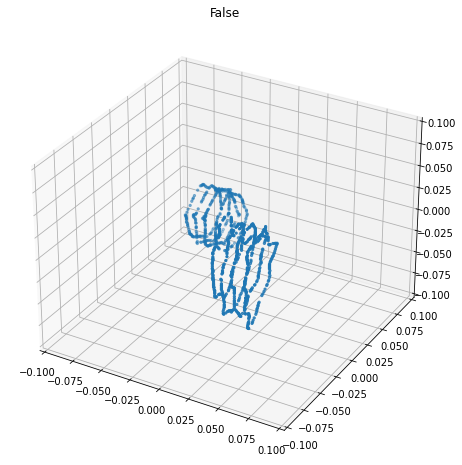

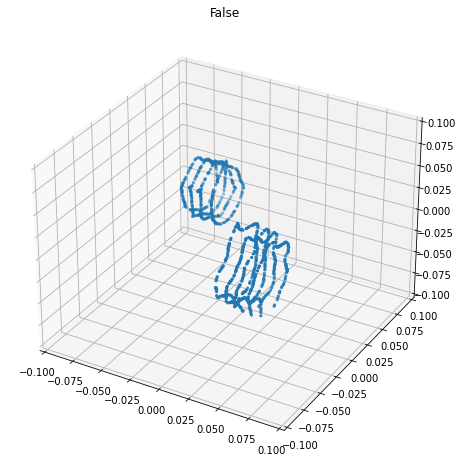

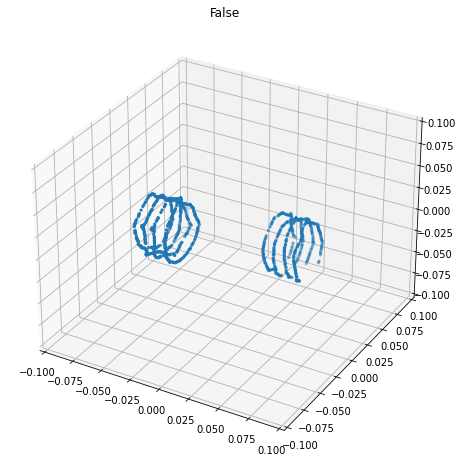

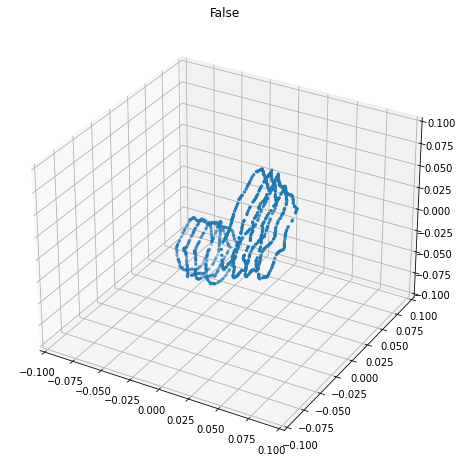

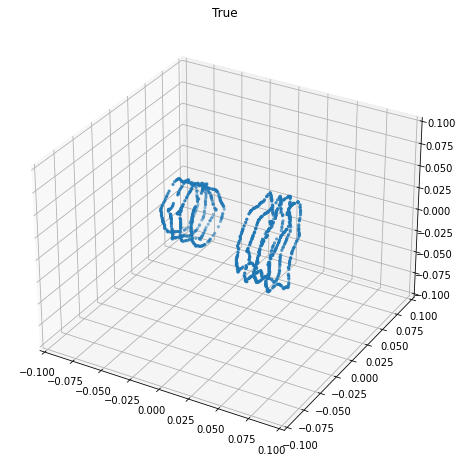

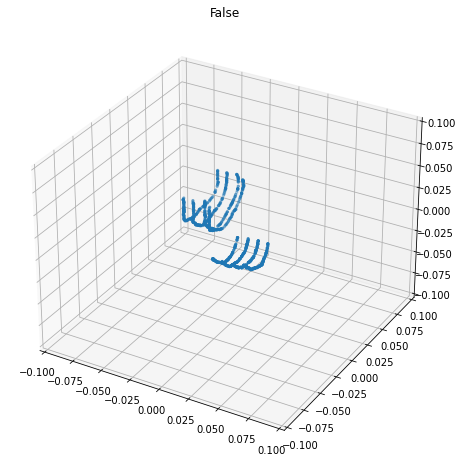

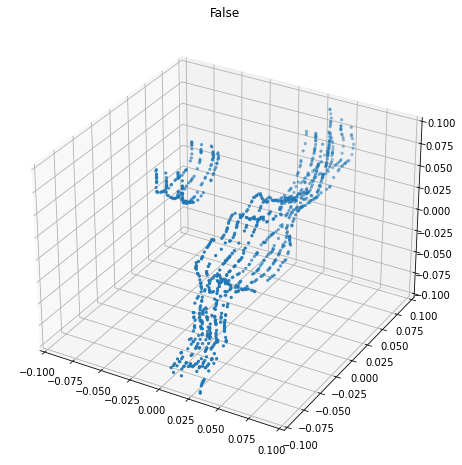

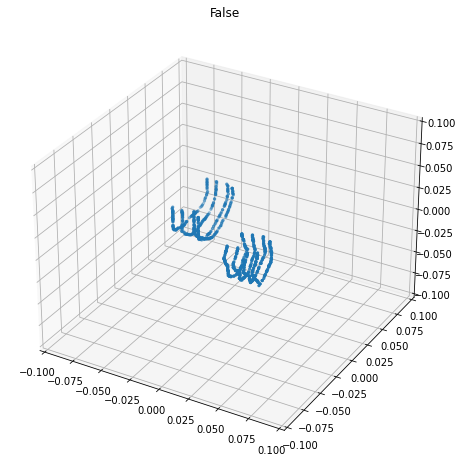

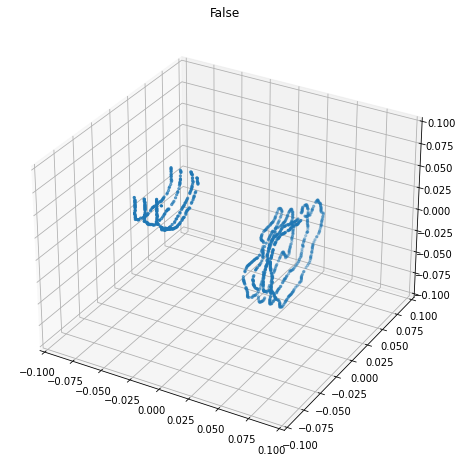

3 tensor([[0, 2],
        [0, 2],
        [0, 2],
        [1, 2],
        [0, 2],
        [0, 3],
        [0, 3],
        [0, 3],
        [0, 3],
        [0, 3],
        [0, 3],
        [1, 3],
        [0, 3],
        [0, 3],
        [0, 3],
        [0, 3]])


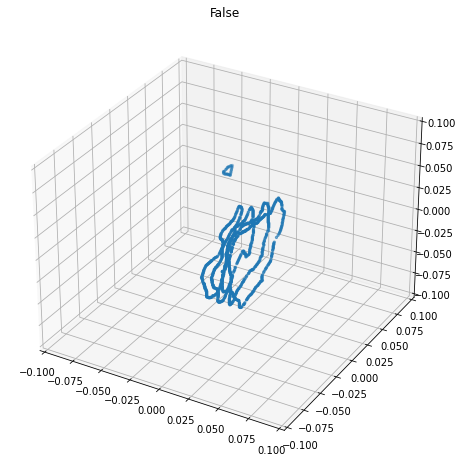

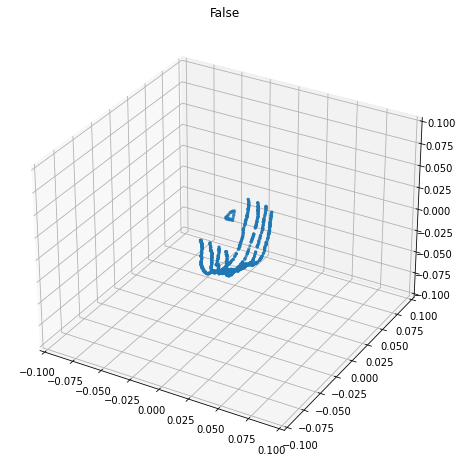

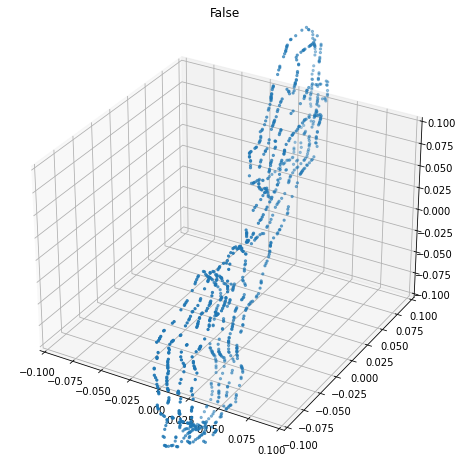

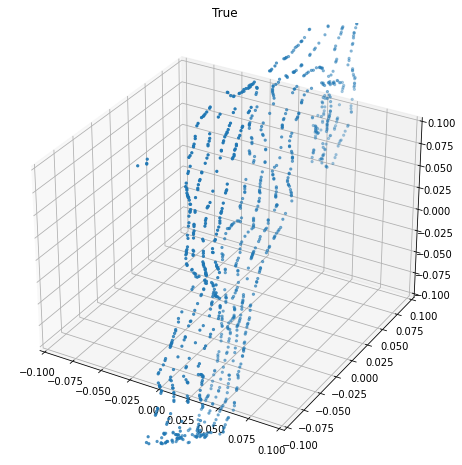

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x138136820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1297, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/connection.py", line 936, in wait
    ready = selector.select(timeout)
  File "/usr/local/Cellar/p

KeyboardInterrupt: 

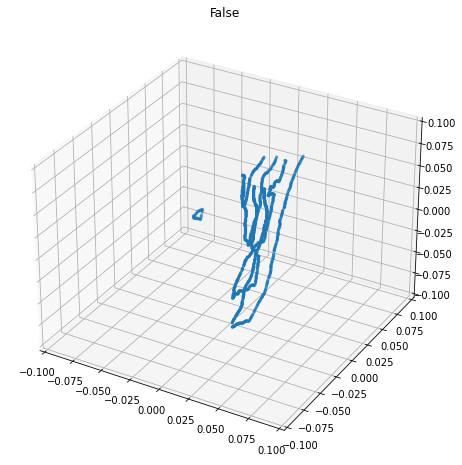

In [5]:
dataloader = DataLoader(dataset=tester, batch_size=16, num_workers=3)
lim = (-.1,.1)
lim = (lim,lim,lim)
for step, batch in enumerate(dataloader):
    x, y = batch
    print(step, y)
    # for i in range(x.shape[0]):
    #     pc = np.swapaxes(x[i], 0, 1)
    #     label = y[i][0].item() == 1
    #     plot_3d(pc, title=label, lims=lim)

